# **Chaînes de Markov-HMMs**
## BGDIA704 -Machine Learning Avancé
## **Yiboe Ossee**

**Mars 2023**

#### Laurence Likforman-Sulem, Morgan Buisson, David Perera
#### TELECOM Paris
Ce TP se déroule en deux parties. La première partie concerne les chaînes de Markov et est à finir absolument. 
Les plus rapides d’entre vous pourront aborder la deuxième partie qui traite
des HMMs. 
Les ressources (matrices de transition, modèles HMM) sont sur ecampus et sur :

Partie I : http://perso.telecom-paristech.fr/~lauli/TP_Chaine_Markov/

Partie II : http://perso.telecom-paristech.fr/~lauli/TPHMM_MDI343/

## **I.1 Fonctions dont vous pouvez avoir besoin**

**cumsum** : fonction de répartition : somme cumulative des termes du vecteur p

import numpy as np

np.cumsum(p)

**random** : génère un nombre aléatoire entre [0 1] selon une loi uniforme.

import numpy as np

np.random.random()

**load** : chargement d’un fichier

filename_A= 'bigramenglish.txt'

np.loadtxt(filename_A)

**Création du dictionnaire clé-valeur associant états et caractères :**

dic={'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j','12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' :'q', '19' : 'r' , '20': 's', '21' : 't', '22': 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' ' }

**Inverser le dictionnaire (les valeurs deviennent les clés et réciproquement)**

dic_inv = {v: k for k, v in dic.items()}

## **I.2 Chaîne de Markov**
On veut générer des mots dans une langue donnée en modélisant la formation de ces mots par une chaîne de Markov. Les 28 états du modèle correspondent aux 26 lettres de l’alphabet auxquelles et on ajoute un état ‘espace initial’ (état 1) et un état ‘espace final’ (état 28) qui sert à terminer les mots.

La correspondance entre la valeur numérique d’un état et un caractère est la suivante : l’état 1 correspond à un espace (avant le début d’un mot) et l’état 28 à celui d’un espace en fin de mot. 

Les états 2 à 27 correspondent aux caractères de a à z. On pourra utiliser une structure de dictionnaire en python pour faire cette correspondance.

On utilisera une chaîne de Markov ergodique entre les 26 états correspondants aux lettres de l’alphabet.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ROOT_PATH = '/content/drive/MyDrive/HMM/'


Mounted at /content/drive


In [ ]:
# Imports

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
# Dictionnaire en python pour faire cette correspondance

dico={'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h',\
      '10': 'i', '11': 'j','12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' :'q',\
      '19' : 'r' , '20': 's', '21' : 't', '22': 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' ' }

# Inverser le dictionnaire (les valeurs deviennent les clés et réciproquement)

dico_inv = {v: k for k, v in dico.items()}
dico_inv

{' ': '28',
 'a': '2',
 'b': '3',
 'c': '4',
 'd': '5',
 'e': '6',
 'f': '7',
 'g': '8',
 'h': '9',
 'i': '10',
 'j': '11',
 'k': '12',
 'l': '13',
 'm': '14',
 'n': '15',
 'o': '16',
 'p': '17',
 'q': '18',
 'r': '19',
 's': '20',
 't': '21',
 'u': '22',
 'v': '23',
 'w': '24',
 'x': '25',
 'y': '26',
 'z': '27'}

### **I.2.a Matrice de transitions**

'bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). 

Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i.

A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la dernière colonne ?

Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre. 

#### Réponses :

- La première ligne de la matrice de transition correspond aux probabilités de passer de l'état initial (espace) aux autres états. La somme de toutes les probabilités de la première ligne doit être égale à 1, car il est certain qu'un symbole doit être généré après l'espace initial.

- La dernière colonne de la matrice de transition correspond aux probabilités de passer de chaque état à l'état final (espace). La somme de toutes les probabilités de la dernière colonne doit également être égale à 1, car il est certain qu'un mot doit se terminer par un espace.

Pour chaque lettre de l'alphabet, la transition la plus fréquente depuis cette lettre est celle qui a la plus grande probabilité de transition à partir de cet état dans la matrice de transition. Il suffit donc de chercher la valeur maximale dans chaque ligne correspondant à chaque lettre. 

Par exemple, pour la lettre 'a', nous recherchons la valeur maximale dans la deuxième ligne de la matrice de transition (car l'état 2 correspond à la lettre 'a').

In [ ]:
# indiquer la transition la plus fréquente depuis cette lettre.

# load : chargement d’un fichier

bigramenglish= 'bigramenglish.txt'

beng = np.loadtxt(ROOT_PATH + bigramenglish)

most_frequent_transitions = {}

# Parcours de chaque lettre de l'alphabet
for i in range(1, 27):
    letter = dico[str(i)]
    # Recherche de la transition la plus fréquente pour cette lettre
    #max_prob = np.max(beng[i, :])
    max_index = np.argmax(beng[i, :]) + 1
    most_frequent_transitions [dico[str(i + 1)]] = max_index
    # Affichage des résultats
    #print(f"La transition la plus fréquente depuis la lettre '{letter}' est '{max_letter}' avec une probabilité de {max_prob:.4f}.")
print("Transitions les plus fréquentes pour chaque lettre de l'alphabet sont :")
for letter, transition in most_frequent_transitions.items():
    print("{} -> {}".format(letter, dico[str(transition)]))

Transitions les plus fréquentes pour chaque lettre de l'alphabet sont :
a -> n
b -> e
c -> o
d ->  
e ->  
f ->  
g ->  
h -> e
i -> n
j -> o
k ->  
l -> e
m -> e
n ->  
o -> n
p -> e
q -> u
r -> e
s ->  
t -> h
u -> r
v -> e
w -> a
x -> t
y ->  
z -> e


In [ ]:
beng.shape

(28, 28)

### **I.2.b Générer un mot**

On veut générer un mot à partir de l’état initial 1 (espace de début de mot).
Ecrire une fonction etat_suivant qui génère un état (à t+1) à partir de l’état courant (à t) et à l’aide de la matrice de transitions et de la fonction de répartition.

Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.

Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence d’états jusqu’à aboutir à l’état final (28). 

Ecrire une fonction display_seq qui transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire. 

Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés.

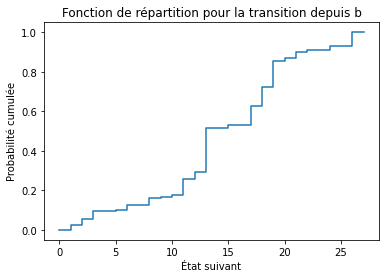

In [ ]:
# Fonction etat_suivant()

def etat_suivant(current_state, transition_matrix):
    """Génère l'état suivant à partir de l'état courant et de la matrice de transitions"""
    cum_probs = np.cumsum(transition_matrix[current_state-1])
    rand_num = np.random.random()
    #next_state = np.searchsorted(cum_probs, r)
    etat_suivant = np.argmax(cum_probs >= rand_num) + 1  # find first index of cumulative probability >= random number
    return etat_suivant

# Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition
def repartition (row, beng):
  '''Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition'''
   # exemple : transition depuis l'état correspondant à 'a'
  cum_probs = np.cumsum(beng[row-1,:])
  etats = range(len(beng[row-1,:]))
  plt.step(etats, cum_probs)

  plt.title(f"Fonction de répartition pour la transition depuis {dico[str(row+1)]}")
  plt.xlabel("État suivant")
  plt.ylabel("Probabilité cumulée")
  plt.show()

row= 2
repartition (row, beng)

#### Réponse à expliquer son rôle pour la génération de l’état à t+1.

- La fonction de répartition donne la probabilité cumulée d'aboutir à chaque état suivant à partir de l'état courant. Elle est utilisée pour générer l'état suivant aléatoirement, en choisissant un nombre aléatoire entre 0 et 1 et en le comparant à chaque probabilité cumulée.



In [ ]:
# Fonction genere_state_seq()

def genere_state_seq(transition_matrix):
    """Génère une séquence d'états jusqu'à aboutir à l'état final
    
    Args:
    - transition_matrix : np.ndarray, matrice de transition
    
    Returns:
    - list, séquence d'états
    """
    state_seq = [1] # état initial
    current_state = 1
    while state_seq[-1] !=len(transition_matrix):
        current_state = etat_suivant(current_state, transition_matrix)
        state_seq.append(current_state)
    return state_seq

# Fonction display_seq()

def display_seq(seq, dico):
  """Transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire
  Args:
    - seq : list, séquence d'états
    - dico : dict, dictionnaire clé-valeur associant états et caractères
    
    Returns:
    - str, séquence de caractères
    """
  return ''.join([dico[str(s)] for s in seq])


In [ ]:
seq = genere_state_seq(beng)
print("La sequence générée est :", seq, "\n")

mot = display_seq(seq, dico)
print("Le mot généré est :", mot, "\n")


La sequence générée est : [1, 21, 6, 28] 

Le mot généré est :  te  



#### Exemples de mot générés: 

- fonds
- ct
- tha
- iendowilivigons

### **I.2.c Générer une phrase**

On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29, correspondant au caractère .) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. 

Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition
et le dictionnaire en conséquence. 

Donner des exemples de phrases générées.

In [ ]:
# Fonction modifie_mat_dic()

def modifie_mat_dic(matrice_transition, dico, dico_inv):
    """
    Modifie la matrice de transition et le dictionnaire pour ajouter l'état final de phrase.
    
    Args:
    - matrice_transition : np.ndarray, matrice de transition
    - dictionnaire : dict, dictionnaire clé-valeur associant états et caractères
    
    Returns:
    - np.ndarray, matrice de transition modifiée
    - dict, dictionnaire modifié
    """

    # Augmentation de la taille de la matrice de transition pour inclure l'état 29
    matrice_transition = np.insert(matrice_transition, 27, np.zeros(28), axis=0)
    matrice_transition = np.insert(matrice_transition, 28, np.zeros(29), axis=1)
    
    # Mise à jour de la matrice de transition
    matrice_transition[27, 28] = 0.1
    matrice_transition[27, 0] = 0.9
    matrice_transition[28, 28] = 1
    matrice_transition[27, 27] = 0

    # Ajout de l'état final de phrase
    dico2 = dico.copy()
    dico2['29'] = '.'
    dico_inv2 = {v: k for k, v in dico2.items()}

    return matrice_transition, dico2, dico_inv2


In [ ]:
beng2, dico2, dico_inv2 = modifie_mat_dic(beng, dico, dico_inv)

In [ ]:
print(beng2.shape)
print(dico2)
print(dico_inv2)

(29, 29)
{'1': ' ', '2': 'a', '3': 'b', '4': 'c', '5': 'd', '6': 'e', '7': 'f', '8': 'g', '9': 'h', '10': 'i', '11': 'j', '12': 'k', '13': 'l', '14': 'm', '15': 'n', '16': 'o', '17': 'p', '18': 'q', '19': 'r', '20': 's', '21': 't', '22': 'u', '23': 'v', '24': 'w', '25': 'x', '26': 'y', '27': 'z', '28': ' ', '29': '.'}
{' ': '28', 'a': '2', 'b': '3', 'c': '4', 'd': '5', 'e': '6', 'f': '7', 'g': '8', 'h': '9', 'i': '10', 'j': '11', 'k': '12', 'l': '13', 'm': '14', 'n': '15', 'o': '16', 'p': '17', 'q': '18', 'r': '19', 's': '20', 't': '21', 'u': '22', 'v': '23', 'w': '24', 'x': '25', 'y': '26', 'z': '27', '.': '29'}


In [ ]:
def genere_phrase(matrice_transition, dictionnaire):
    """
    Génère une phrase à partir de la matrice de transition et du dictionnaire donnés en entrée.
    La phrase se termine par le caractère ".".
    """
    phrase = []
    seq_etats = genere_state_seq(matrice_transition)
    phrase.append(display_seq(seq_etats,dictionnaire))
    phrase = "".join([ p for p in phrase])
    return phrase

In [ ]:
genere_phrase(beng2, dico2)

' in  thededar  w  d  l  propthit  gldilldee .'

## **I.3. Reconnaissance de la langue**

Charger la matrice des transitions entre caractères pour le français. 

Ecrire une fonction calc_vraisemblance qui calcule la vraisemblance du modèle français pour une phrase donnée en multipliant les probabilités de transition. 

Pour tenir compte de toutes les transitions (notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra transformer une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , +
et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase, respectivement.

Calculer la vraisemblance des modèles français et anglais pour la phrase « to be or not to be ».

De même calculer la vraisemblance des modèles français et anglais pour la phrase « etre ou ne pas etre ».

In [ ]:
# load : chargement d’un fichier

bigramfrancais= 'bigramfrancais.txt'

benf = np.loadtxt(ROOT_PATH + bigramfrancais)

In [ ]:
# Modifier la fonction de mise à jour des transitions et du vocabulaire

def modifie_mat_dic_2(benf, dico):
    # Ajout de l'état final de phrase
    benf2 = np.zeros((29, 29))
    benf2[:28, :28] = benf
    benf2[27, 28] = 0.1
    benf2[27, 0] = 0.9
    benf2[28, 28] = 1
    benf2[27, 27] = 0
    
    # Modification du dictionnaire
    dico_fr= dico.copy()
    dico_fr['29'] = '.'
    dico_fr['1'] = '-'
    dico_fr['28'] = '+'
    dico_fr_inv = {v: k for k, v in dico_fr.items()}
    
    return benf2, dico_fr, dico_fr_inv

matrix_eng, dico_eng, dico_eng_inv = modifie_mat_dic_2(beng, dico)
matrix_fr, dico_fr, dico_fr_inv = modifie_mat_dic_2(benf, dico)

In [ ]:
#Calcule la vraisemblance d'une phrase pour un modèle de langage donné.
def calc_vraisemblance (matrice_transition, dico_inv, phrase) :
  """
  Args:
  - phrase : str, phrase à évaluer
  - transition_matrix : np.ndarray, matrice de transition pour le modèle de langage

  Returns:
  - float, vraisemblance de la phrase pour le modèle de langage
  """
  phrase_modifiee = []
  for mot in phrase.split() :

    # Ajout des états initiaux et finaux
    phrase_modifiee += ['-{}+'.format(mot)]

  # Calcul de la vraisemblance
  phrase_modifiee[-1] += '.'
  mots = ''.join([m for m in phrase_modifiee])
  seq = [int(dico_inv[carac]) - 1 for carac in mots] # Getting indexes from vocabulary

  vraisemblance = 1
  for i in range(len(seq) - 1):
      transition = (seq[i], seq[i+1])
      vraisemblance *= matrice_transition[transition]

  return vraisemblance

### **Vraisemblance de la phrase "to be or not to be" pour le modèle français et anglais**


In [ ]:
phrase_eng = "to be or not to be"
vraisemblance_eng = calc_vraisemblance(matrix_eng, dico_eng_inv, phrase_eng)
print("Vraisemblance (anglais) :", vraisemblance_eng)

vraisemblance_fr = calc_vraisemblance(matrix_fr, dico_fr_inv , phrase_eng)
print("Vraisemblance (français) :", vraisemblance_fr)

#******************************************


Vraisemblance (anglais) : 8.112892227809415e-20
Vraisemblance (français) : 5.9602081018686406e-30


### **Vraisemblance de la phrase "etre ou ne pas etre" pour le modèle français et anglais**

In [ ]:
phrase_fr = "etre ou ne pas etre"
vraisemblance_eng = calc_vraisemblance(matrix_eng, dico_eng_inv, phrase_fr)
print("Vraisemblance (anglais) :", vraisemblance_eng)

vraisemblance_fr = calc_vraisemblance(matrix_fr, dico_fr_inv , phrase_fr)
print("Vraisemblance (français) :", vraisemblance_fr)

Vraisemblance (anglais) : 4.462288711775253e-24
Vraisemblance (français) : 1.145706887234789e-19


# **II. 1. Introduction**

L’objectif de cette partie est de générer des séquences d’observations suivant un modèle de Markov Caché donné, puis de calculer la vraisemblance d’une séquence d’observations suivant un modèle de Markov Caché donné.

Le modèle de Markov est de type discret. Les classes de caractères (classes 0, 1, 7) sont modélisées chacune par un modèle à Q=5 états de type gauche-droite.

Les états 1 et 5 correspondent à des colonnes de pixels de type fond de l’image (niveau 0). Les états 2, 3 et 4 correspondent au début, milieu et fin du caractère respectivement. 

Les transitions entre états sont indiquées dans la matrice de transitions A de taille QxQ. Les vecteurs p sont tous égaux à p=(1 0 0 0 0). 

Les séquences d’états commencent donc toujours par l’état q1=1.

Les séquences d’observations sont discrètes et issues d’images de chiffres de la base MNIST.

Les séquences d’observations consistent en séquences d’index (symboles) des éléments du dictionnaire. Ce dictionnaire est stocké sous forme matricielle (matrice v) dans le fichier matrice_symboles. 

L’élément numéro i d’une séquence d’observations correspond au
symbole i et donc à la colonne i de la matrice v. Un symbole correspond à une configuration de colonne de 5 pixels (binaires : noir/blanc). Il y a 2^5
=32 configurations, et donc symboles possibles.

Une séquence d’observations correspondant à l’image simplifiée de la fig. 1 est : [1 1 1 1 1 1 14 23 23 27 18 18 18 12 12 12 12 12 12 12 23 23 23 14 4 1 1 1]

La concaténation des éléments du dictionnaire correspondant aux index de la séquence d’observations peut être visualisée sous forme d’image en remplaçant chaque index par le vecteur de pixels correspondant dans le dictionnaire (Fig. 2).

Les probabilités des observations dans chaque état sont indiquées dans la matrice B (32
lignes, 5 colonnes). 

## **II. 2. Génération de séquences d’observations**

Les matrices A0.txt, B0.txt, vect_p0.txt contiennent les matrices A, B, et le vecteur p correspondant au modèle de Markov caché du chiffre 0. 

Le fichier matrice_symboles.txt contient le dictionnaire. Charger ces fichiers depuis le site pédagogique.

Le dictionnaire de symboles se trouve dans la matrice v qui se charge en utilisant :

import numpy as np

filename=’matrice_symboles.txt’

v=np.loadtxt(filename) 

In [ ]:
# Chargement des matrices A, B et vect_p correspondant au modèle de Markov caché du chiffre 0

REP_PATH = './data_txt_compact/'

A = np.loadtxt(ROOT_PATH + REP_PATH +'A0.txt')
B = np.loadtxt(ROOT_PATH + REP_PATH + 'B0.txt')
pi = np.loadtxt(ROOT_PATH + REP_PATH + 'vect_pi0.txt')

In [ ]:
# Chargement du dictionnaire de symboles

filename = 'matrice_symboles.txt'
v = np.loadtxt(ROOT_PATH + REP_PATH + filename)

### **II. 2.1 A quoi correspondent les zéros de la matrice B ? et ceux de la matrice A et du vecteur p ?**

#### **Réponses** :

- Dans la matrice A et le vecteur p, les zéros correspondent à des probabilités nulles de transition d'un état à un autre. Autrement dit, ces transitions ne peuvent jamais se produire dans le modèle de Markov caché.

- Dans la matrice B, les zéros correspondent à des probabilités nulles d'observer un certain symbole dans un certain état. Autrement dit, ces symboles ne peuvent jamais être observés dans ces états.


### **II.2.2 Ecrire une fonction etat_suivant qui génère un état qt+1(à t+1) à partir de l’état courant qt (à t) à l’aide de la matrice de transitions et de la fonction de répartition cumsum.**

**Afficher la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.**

In [ ]:
# Fonction etat_suivant
def etat_suivant(current_state, transition_matrix):
    """Génère l'état suivant à partir de l'état courant et de la matrice de transitions"""
    cum_probs = np.cumsum(transition_matrix[current_state-1])
    rand_num = np.random.random()
    etat_suivant = np.argmax(cum_probs >= rand_num) + 1  # find first index of cumulative probability >= random number
    return etat_suivant


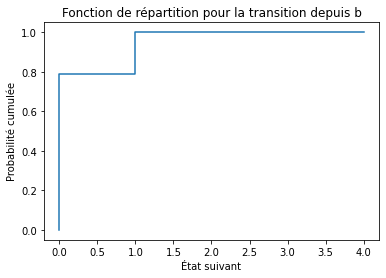

In [ ]:
# Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition
def repartition (row, beng):
  '''Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition'''
   # exemple : transition depuis l'état correspondant à 'a'
  cum_probs = np.cumsum(beng[row-1,:])
  etats = range(len(beng[row-1,:]))
  plt.step(etats, cum_probs)

  plt.title(f"Fonction de répartition pour la transition depuis {dico[str(row+1)]}")
  plt.xlabel("État suivant")
  plt.ylabel("Probabilité cumulée")
  plt.show()

row= 2
repartition (row, A)

### **II.2.3 Générer une séquence d’observations suivant le modèle de Markov Caché du chiffre 0.**

**On commencera par générer une séquence d’états suivant ce modèle à l’aide de la fonction etat_suivant. Puis on générera la séquence d’observations par le même procédé.** 

### **Notes :**

The code below defines three functions to generate sequences of states and observations based on given state transition probabilities and observation probabilities in a Hidden Markov Model:

- **generer_etats(transitions)**: Generates a sequence of states based on the given state transition probabilities transitions. The function starts from state 1, appends the current state to the sequence, and iterates through states until reaching the final state.

- **generer_obs(seq_etats, transitions):** Generates an observation based on the current state and the observation probabilities transitions. This function takes a sequence of states seq_etats and the observation probability matrix transitions, then calculates the cumulative probabilities for observing each symbol given the current state. It generates a random number and finds the index of the first cumulative probability that is greater or equal to the random number, which corresponds to the generated observation.

- **generer_seq(A, B, p):** Generates a sequence of states and observations based on the state transition probability matrix A, the observation probability matrix B, and the initial state probabilities p. The function starts by choosing an initial state according to the probabilities in p, generates an observation for that state, and iterates until reaching the final state. The generated sequences of states and observations are returned.

In [ ]:
# Générer une sequence d'etats
def generer_etats(transitions):
    etat_courant = 1
    seq_etats = [1]
    while etat_courant != len(transitions): # tant qu'on n'a pas atteint l'état final
        etat_courant = etat_suivant(etat_courant, transitions)
        seq_etats.append(etat_courant)
    return seq_etats


# Générer une observation
def generer_obs(seq_etats, transitions):
    symboles = transitions[:, seq_etats-1]  
    cum_probs = np.cumsum(symboles)  
    rand_num = np.random.random()  
    ob = np.argmax(cum_probs >= rand_num) + 1  # find first index of cumulative probability >= random number
    return ob

# Générer une sequence d'observations et d'états
def generer_seq(A, B, p):
    seq_etats = []
    seq_obs = []
    etat_courant = np.random.choice(range(1, A.shape[0]+1), p=p)
    seq_etats = [etat_courant]
    obs_courante = generer_obs(etat_courant, B)
    seq_obs.append(obs_courante)  
    while etat_courant != len(A): # tant qu'on n'a pas atteint l'état final
        etat_courant = etat_suivant(etat_courant, A)
        seq_etats.append(etat_courant)
        obs_courante = generer_obs(etat_courant, B)
        seq_obs.append(obs_courante)   
    return seq_etats, seq_obs


In [ ]:
seq_etats, seq_obs = generer_seq(A, B,pi)
print(seq_etats)
print(seq_obs)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 14, 23, 23, 23, 30, 30, 14, 14, 23, 18, 18, 27, 27, 18, 12, 18, 12, 23, 11, 27, 23, 1]


### **II.2.4 Visualiser le résultat sous forme d’image. Générer des séquences pour le chiffre 7 et le chiffre 1 (matrices B1.txt, B7.txt, etc…)**

import matplotlib.pyplot as plt

im=[ ]

Les x contiennent les index dans le dictionnaire

for t in range (0,len(stateSeq)) :

  im_col=v[:, x[t]-1]

  im.append(im_col)
  
im = np.array(im).T # now make an array

plt.imshow(im*255, cmap=’Greys’, interpolation=’none’, aspect=’auto’)

#### **Notes :**

- To generate a sequence of observations following the Hidden Markov Model for digit 0, we can use the following steps:

  - Initialize the model parameters (A, B, pi) for digit 0.

  - Sample the first state from the initial distribution pi.

  - For each time step:
    - a. Sample the next state based on the transition probabilities in matrix A.
    - b. Sample the observation based on the emission probabilities in matrix B for the current state.

  - Repeat step 3 for the desired length of the sequence.

- To visualize the generated sequence as an image, we can map the sequence of symbols to their corresponding pixel values in the dictionary matrix v, and concatenate these values to form a matrix representing the image. 

- We can then use the imshow function from the matplotlib.pyplot module to display the image.

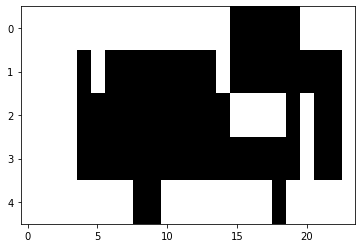

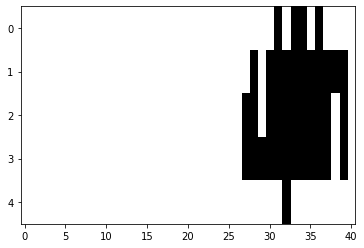

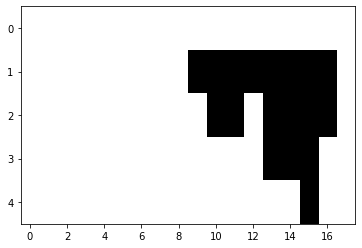

In [ ]:
# Afficher la séquence d'observations sous forme d'image

# Load the test sequences
A_file_names = ['A0.txt', 'A1.txt', 'A7.txt']
B_file_names = ['B0.txt', 'B1.txt', 'B7.txt']
pi_file_names = ['vect_pi0.txt', 'vect_pi1.txt', 'vect_pi7.txt']

for t in range(len(A_file_names)) :

  A = np.loadtxt(ROOT_PATH + REP_PATH + A_file_names[t])
  B = np.loadtxt(ROOT_PATH + REP_PATH + B_file_names[t])
  pi = np.loadtxt(ROOT_PATH + REP_PATH + pi_file_names[t])

  seq_etats, seq_obs = generer_seq(A, B,pi)

  im =[]
  for t in range (0,len(seq_etats)) :
    im_col = v[:, seq_obs[t]-1]
    im.append(im_col)

  im = np.array(im).T # now make an array

  plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
  plt.show()

## **II.3. Calcul de la vraisemblance de séquences d’observations**

Les fichiers SeqTest0.txt, SeqTest1.txt, SeqTest7.txt contiennent chacun 10 séquences d’observations de chiffres des 3 classes 0, 1 et 7, disposés en ligne. Le script suivant extrait la 5ème observation de la 3ème séquence des chiffres 0.

filename=’SeqTest0.txt’. 

TestChiffres=np.loadtxt(filename)

nex=2

seq= TestChiffres[nex, : ]

seq[4]

### **II.3.1 Calculer la vraisemblance de ces séquences suivant chacun des modèles (0, 1 et 7) par l’algorithme de Viterbi (on pourra implémenter la version logarithmique de cet algorithme).**

**Pour cela les matrices A, B et p seront converties en logarithmes (utiliser np.log).**

In [ ]:
# Define the Viterbi algorithm function
def viterbi(obs, states, start_p, trans_p, emit_p):
    """
    Return the most probable state sequence corresponding to the given observations, 
    using the Viterbi algorithm for a Hidden Markov Model.

    obs: a sequence of observations
    states: a sequence of possible states
    start_p: a dictionary of starting probabilities for each state
    trans_p: a transition probability matrix between states
    emit_p: a emission probability matrix of each state for each observation
    """
    V = [{}]
    path = {}
    start_p = np.log(start_p + 1e-10)
    # Initialize base cases (t=0)
    for state in states:
        V[0][state] = emit_p[obs[0]][state] * start_p[state] #np.log(emit_p[obs[0]][state] + 1e-10) + start_p[state] #   
        path[state] = [state]

    # Run Viterbi for t > 0
    for t in range(1, len(obs)):
        V.append({})
        new_path = {}

        for state in states:
            # Find the maximum probability and the corresponding state from the previous timestep
            (prob, prev_state) = max((V[t-1][prev_state] + np.log(trans_p[prev_state][state] + 1e-10)  + np.log(emit_p[obs[t]][state] + 1e-10), prev_state) for prev_state in states)

            # Update the probability and path information for this state
            V[t][state] = prob
            new_path[state] = path[prev_state] + [state]

        # Update the path with the new path information
        path = new_path

    # Find the final state with the highest probability
    (prob, state) = max((V[len(obs)-1][state], state) for state in states)
    prob = np.exp(prob)

    # Backtrack to find the most probable state sequence
    state_seq = [state]
    for t in range(len(obs)-1, 0, -1):
        state = path[state][t]
        state_seq.insert(0, state)
    # Return the most likely state sequence and its probability
    return pd.DataFrame.from_dict(V),state_seq, prob


In [ ]:
import numpy as np

seq_file_names = ['SeqTest0.txt', 'SeqTest1.txt', 'SeqTest7.txt' ]

def compute_likehoods(seq_file_names): 
  inds =[0, 1, 7]
  # Load the test sequences
  
  A_file_names = ['A0.txt', 'A1.txt', 'A7.txt']
  B_file_names = ['B0.txt', 'B1.txt', 'B7.txt']
  pi_file_names = ['vect_pi0.txt', 'vect_pi1.txt', 'vect_pi7.txt']

  for k in range(len(seq_file_names)) :
    liste_likehoods = [] 
    A = np.loadtxt(ROOT_PATH + REP_PATH + A_file_names[k])
    B = np.loadtxt(ROOT_PATH + REP_PATH + B_file_names[k])
    pi = np.loadtxt(ROOT_PATH + REP_PATH + pi_file_names[k])
    
    test_sequence = np.loadtxt(ROOT_PATH + REP_PATH + seq_file_names[k]) 

    # Loop over each test sequence and compute its likelihood under each model
    test_sequence = test_sequence.astype('int')
    for j in range(10):
      sequence = [i-1 for i in test_sequence[j] ]
      # Compute the likelihood of the test sequence under the model for digit 0
      _, _, likehood = viterbi(sequence, range(len(A)), pi, A, B)
      print(f"Likelihood for the sequence {j} for Number {inds[k]} is : {likehood} ") 
      liste_likehoods.append(likehood)

  return liste_likehoods

liste_likehoods = compute_likehoods(seq_file_names)

Likelihood for the sequence 0 for Number 0 is : 2.065101785953775e-13 
Likelihood for the sequence 1 for Number 0 is : 6.400822197857806e-15 
Likelihood for the sequence 2 for Number 0 is : 2.1069610013896684e-17 
Likelihood for the sequence 3 for Number 0 is : 1.072206456057848e-14 
Likelihood for the sequence 4 for Number 0 is : 8.246300263168562e-22 
Likelihood for the sequence 5 for Number 0 is : 1.0488454001730436e-14 
Likelihood for the sequence 6 for Number 0 is : 4.776077763747278e-16 
Likelihood for the sequence 7 for Number 0 is : 7.81089759030815e-12 
Likelihood for the sequence 8 for Number 0 is : 3.9171297234277925e-19 
Likelihood for the sequence 9 for Number 0 is : 3.2864651945134956e-10 
Likelihood for the sequence 0 for Number 1 is : 6.92936596005936e-24 
Likelihood for the sequence 1 for Number 1 is : 1.873120764080189e-06 
Likelihood for the sequence 2 for Number 1 is : 7.324306886630195e-11 
Likelihood for the sequence 3 for Number 1 is : 1.2417485878053357e-06 
Lik

### **II.3.2 Donner le résultat de la classification des images de test en considérant un problème à trois classes : 0, 1 et 7.**

### **Notes :**

The make_classification function takes a list of test sequence file names as input and returns a Pandas DataFrame containing the likelihoods of each test sequence under the models for digits 0, 1, and 7.

Here is a step-by-step explanation of what the function does:

- Initialize the result DataFrame with columns "Modèle0", "Modèle1", and "Modèle7".
- Load the test sequences from the given file names and store them in the test_sequences list.
- Load the model parameters for digits 0, 1, and 7: state transition matrices (A0, A1, A7), observation matrices (B0, B1, B7), and initial state probability vectors (pi0, pi1, pi7).
- Iterate through each test sequence in the test_sequences list.
- For each test sequence : 
  - loop through its first 10 instances, 
  - convert the sequence to integer, and 
  - subtract 1 to account for 0-based indexing in Python.
  - Calculate the likelihoods of the test sequence under the models for digits 0, 1, and 7 using the viterbi function.
  - Append the likelihoods to the liste_likehoods list and 
  - add the list to the result DataFrame.
- Convert the result DataFrame to a NumPy array and return it.

To use the make_classification function, you need to provide a list of test sequence file names. 

Assuming that you have the test sequence files "SeqTest0.txt", "SeqTest1.txt", and "SeqTest7.txt" in the REP_PATH directory, you can call the function as follows:

In [ ]:
def make_classification(seq_file_names): 
  inds =[0, 1, 7]

  # Load the test sequences
  result = pd.DataFrame(columns = ["Modèle0","Modèle1", "Modèle7"])

  test_sequences = []
  for k in range(len (seq_file_names)) : 
    test_sequence = np.loadtxt(ROOT_PATH + REP_PATH + seq_file_names[k]) 
    test_sequences.append(test_sequence)


  A0 = np.loadtxt(ROOT_PATH + REP_PATH + 'A0.txt')
  A1 = np.loadtxt(ROOT_PATH + REP_PATH + 'A1.txt')
  A7 = np.loadtxt(ROOT_PATH + REP_PATH + 'A7.txt')

  B0 = np.loadtxt(ROOT_PATH + REP_PATH + 'B0.txt')
  B1 = np.loadtxt(ROOT_PATH + REP_PATH + 'B1.txt')
  B7 = np.loadtxt(ROOT_PATH + REP_PATH + 'B7.txt')

  pi0 = np.loadtxt(ROOT_PATH + REP_PATH + 'vect_pi0.txt')
  pi1 = np.loadtxt(ROOT_PATH + REP_PATH + 'vect_pi1.txt')
  pi7 = np.loadtxt(ROOT_PATH + REP_PATH + 'vect_pi7.txt')

  
  for test_sequence in test_sequences : 
    # Loop over each test sequence and compute its likelihood under each model
    test_sequence = test_sequence.astype('int')
    for j in range(10):
      liste_likehoods = [] 

      sequence = [i-1 for i in test_sequence[j] ]
      # Compute the likelihood of the test sequence under the model for digit 0
      _, _, likehood0 = viterbi(sequence, range(len(A0)), pi0, A0, B0)
      _, _, likehood1 = viterbi(sequence, range(len(A0)), pi1, A1, B1)
      _, _, likehood7 = viterbi(sequence, range(len(A0)), pi7, A7, B7)

      liste_likehoods.append(likehood0)
      liste_likehoods.append(likehood1)
      liste_likehoods.append(likehood7)

      result.loc[len(result)] = liste_likehoods

  return result

probas = make_classification(seq_file_names).to_numpy()

### **Notes :**

After assuming that the probas array are computed using the make_classification function, this code classifies the test sequences by choosing the model with the highest likelihood for each test sequence. The classification results are stored in a Pandas DataFrame named output.

Here is a step-by-step explanation of the code:

- Initialize an empty DataFrame called output with a single column named "Predictions".
- Find the index of the maximum likelihood value in each row of the probas array using np.argmax(probas, axis=1). This returns a 1D NumPy array containing the indices of the models with the highest likelihoods for each test sequence.
- Replace the index value 2 with 7 in the max_likelihood_index array, since the third model corresponds to digit 7.
- Create a new DataFrame called output using the max_likelihood_index array and the column name "Predictions".
- Display the output DataFrame, which contains the classification results for each test sequence.

In [ ]:
output = pd.DataFrame(columns = ["Predictions"])

# Classify the test sequence based on the model with the highest likelihood

max_likelihood_index = np.argmax(probas, axis=1)
max_likelihood_index = [7 if i == 2 else i for i in max_likelihood_index]
output = pd.DataFrame(max_likelihood_index, columns = ["Predictions"])
display(output)

,Predictions
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### **Results :**

The table above, which is the output of the classification process, displays the predictions for each test sequence. The table shows the following classification results:

- **Test sequences 0 to 9 are classified as digit 0.**
- **Test sequences 10 to 19 are classified as digit 1.**
- **Test sequences 20 to 29 are classified as digit 7, except for sequence 22, which is classified as digit 1.**

The indices on the left side represent the test sequence number, and the "Predictions" column displays the digit that the test sequence was classified as (0, 1, or 7). The results suggest that **the classification process works well for most of the test sequences, with only one misclassification (test sequence 22).**